Hi! This is a notebook. You can write code or text here.

# Basics

In [1]:
print("hey")

hey


In [2]:
for i in range(7):
    print("rohan"),

rohan
rohan
rohan
rohan
rohan
rohan
rohan


In [3]:
x = 2

In [4]:
print(x + 4 - 2 + 0)

4


# Numpy Basics

In [5]:
import numpy as np

In [6]:
a = np.array([1, 2, 3])
print(a.shape)
print(a.size)
print(a.ndim)

(3,)
3
1


In [7]:
x = np.arange(100)
print(x.shape)
print(x.size)
print(x.ndim)

(100,)
100
1


In [8]:
y = np.random.rand(5, 20)
print(y.shape)
print(y.size)
print(y.ndim)

(5, 20)
100
2


In [9]:
x.shape = (20, 5)

In [10]:
x.shape = (20, -1)
print(x.shape)

(20, 5)


In [11]:
# Slicing
print("First 5 rows\n", x[:5])
print("Row 18 to the end\n", x[18:])
print("Last 5 rows\n", x[-5:])
print("Reverse the rows\n", x[::-1])

First 5 rows
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
Row 18 to the end
 [[90 91 92 93 94]
 [95 96 97 98 99]]
Last 5 rows
 [[75 76 77 78 79]
 [80 81 82 83 84]
 [85 86 87 88 89]
 [90 91 92 93 94]
 [95 96 97 98 99]]
Reverse the rows
 [[95 96 97 98 99]
 [90 91 92 93 94]
 [85 86 87 88 89]
 [80 81 82 83 84]
 [75 76 77 78 79]
 [70 71 72 73 74]
 [65 66 67 68 69]
 [60 61 62 63 64]
 [55 56 57 58 59]
 [50 51 52 53 54]
 [45 46 47 48 49]
 [40 41 42 43 44]
 [35 36 37 38 39]
 [30 31 32 33 34]
 [25 26 27 28 29]
 [20 21 22 23 24]
 [15 16 17 18 19]
 [10 11 12 13 14]
 [ 5  6  7  8  9]
 [ 0  1  2  3  4]]


In [12]:
print(x[[1, 3, 5], :])

[[ 5  6  7  8  9]
 [15 16 17 18 19]
 [25 26 27 28 29]]


# Importing Data

From csv:

In [14]:
import csv
import numpy as np

dest_file = "bv_data.csv"

with open(dest_file, 'r') as dest_f:
    data_iter = csv.reader(dest_f, quotechar = '"')
    data = [data for data in data_iter]
    
data_array = np.asarray(data[1:], dtype = float) # use dtype to ensure it's correct data type

# Skip the pesky "x" and "y" column headers. 
X = data_array[:,0]
y = data_array[:,1]

From txt:

In [16]:
# CSV files also work for np.genfromtxt
data = np.genfromtxt('bv_data.csv', delimiter = ',', skip_header=1)
X = data[:, 0]
y = data[:, 1]

# Separating Data: K-fold validation

In [17]:
from sklearn.model_selection import KFold

In [18]:
# Let's use the same data as before.
kf = KFold(n_splits = 5)
inds = [ind for ind in kf.split(X, y)]
train, val = inds[0]

# You can use X[train], X[val] to get the training and validation data for the first split.

# Matplotlib Basics

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

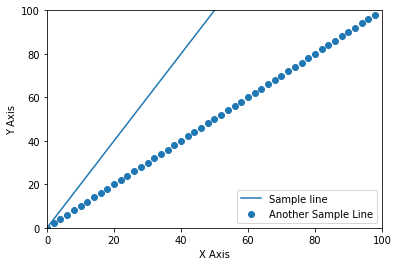

In [20]:
xs = range(100)
ys = range(0, 200, 2)
plt.plot(xs, ys, label = "Sample line")

xs2 = range(0, 100, 2)
ys2 = range(0, 100, 2)
plt.scatter(xs2, ys2, label = "Another Sample Line")

plt.xlabel("X Axis")
plt.ylabel("Y Axis")
plt.legend()

plt.xlim(0, 100)
plt.ylim(0, 100)
plt.show()

There are lot more fancy features but you can read about those yourself in a tutorial (see the recitation slides) if you're not aware of them already. 

# Example - polynomial regression

Here we're going to do a more in depth example, using numpy to compute a degree 6 polynomial fit and find its errors.

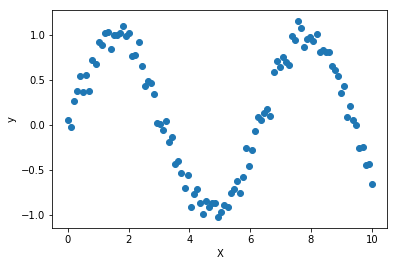

In [21]:
# Generate a toy dataset.
X = np.linspace(0, 10, 100)
noise = np.random.normal(0, 0.1, size=100)
y = np.sin(X) + noise

plt.scatter(X, y)

plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [22]:
from sklearn.model_selection import train_test_split

# Do a 80-20 training validation split.
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [26]:
x_train

array([ 3.93939394,  2.62626263,  2.02020202,  3.73737374,  0.3030303 ,
        0.70707071,  4.94949495,  7.37373737,  9.5959596 ,  8.98989899,
        7.87878788,  4.34343434,  6.06060606,  8.28282828,  2.42424242,
        1.01010101,  2.32323232,  0.50505051,  8.48484848,  3.33333333,
        1.91919192,  1.31313131,  0.1010101 ,  9.29292929,  9.39393939,
        6.36363636,  6.76767677,  4.84848485,  5.55555556,  4.64646465,
        7.97979798,  9.49494949,  4.14141414,  7.57575758,  3.63636364,
        2.92929293,  5.45454545,  2.82828283,  1.71717172,  5.25252525,
        1.41414141,  0.60606061,  5.65656566,  0.80808081,  1.81818182,
        9.8989899 ,  2.72727273,  1.11111111,  4.24242424,  3.23232323,
        8.38383838,  5.35353535,  3.83838384,  9.19191919,  0.90909091,
        7.17171717,  3.03030303,  0.        ,  8.18181818,  7.67676768,
        9.7979798 ,  0.4040404 ,  1.61616162,  0.2020202 ,  3.53535354,
        4.74747475,  4.54545455,  3.43434343,  8.68686869,  2.12

In [28]:
# Reuse the training data from before. Set dimension as 2.
dim = 6

vals = np.polyfit(x_train, y_train, dim) 
        
# Compute loss.
train_err = np.mean((np.polyval(vals, x_train) - y_train) ** 2)
val_err = np.mean((np.polyval(vals, x_val) - y_val) ** 2)

In [29]:
vals

array([  5.80343504e-04,  -1.66013846e-02,   1.66445058e-01,
        -6.60622053e-01,   6.94764349e-01,   6.08959123e-01,
         3.68793484e-02])

In [30]:
train_err, val_err

(0.0093037835754119641, 0.016752656162836992)

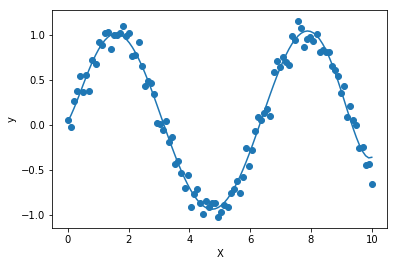

In [31]:
# Let's plot what the final model looks like.
plt.scatter(X, y)
plt.plot(X, np.polyval(vals, X))

plt.xlabel("X")
plt.ylabel("y")
plt.show()